# Comparison centralized/decentralized


In [3]:
# imports
from copy import deepcopy
import numpy as np

from sklearn.utils import shuffle

import sys
sys.path.append('../src/')

from evaluation import alpha_variance, loss, mean_accuracy
from network import complete_graph
from optimization import average_FW, centralized_FW
from utils import get_split, load_breast_dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
X, Y = load_breast_dataset()
M, D = X.shape
N = 10
NB_ITER = 100
RND = 20171217

# split train-test sets
train_index, test_index = next(get_split(X, 5, rnd_state=RND))
train_x, test_x = X[train_index], X[test_index]
train_y, test_y = Y[train_index], Y[test_index]

nodes_iid = complete_graph(train_x, train_y, nb_nodes=N, cluster_data=False, rnd_state=RND)
nodes_no_iid = complete_graph(train_x, train_y, nb_nodes=N, cluster_data=True, rnd_state=RND)

# set test set
test_m = test_x.shape[0]
test_x_copy = np.c_[test_x, np.ones(test_m)]
for n1, n2 in zip(nodes_iid, nodes_no_iid):
    n1.set_test_set(test_x_copy, test_y)
    n2.set_test_set(test_x_copy, test_y)

# set callbacks for optimization analysis
callbacks = {
    'mean-accuracy': [mean_accuracy, []],
    'loss': [loss, []],
    'alpha-variance': [alpha_variance, []]
}

In [14]:
results = {}

nodes_copy = deepcopy(nodes_iid)
results["centralized-iid"] = centralized_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

nodes_copy = deepcopy(nodes_iid)
results["average-iid"] = average_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

nodes_copy = deepcopy(nodes_no_iid)
results["average-no-iid"] = average_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

print("done")

done


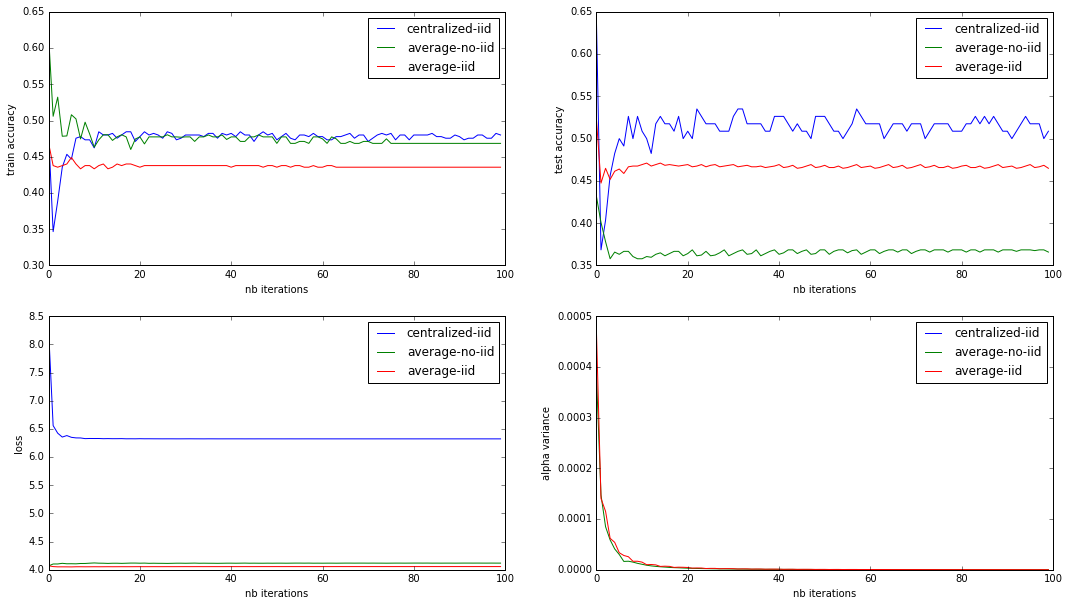

In [15]:
plt.figure(1, figsize=(18, 10))

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in r_list], label='{}'.format(k))
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['loss'] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['alpha-variance'] for r in r_list], label='{}'.format(k))

plt.legend()